# 03. Exploratory Data Analysis

## Objectives

- Perform exploratory analysis of the cleaned tabular dataset
- Generate descriptive statistics and visual summaries of language proficiency scores
- Identify correlations and relationships between different test components
- Highlight trends, anomalies, and patterns relevant to CEFR classification and modelling

## Inputs

- Cleaned dataset from the Data Cleaning phase (data/processed/lang_proficiency_results.csv)
- Python libraries: pandas, numpy, matplotlib, seaborn, pandas_profiling (optional)

## Outputs

- Pandas profiling report or equivalent descriptive overview
- Correlation analysis (correlation heatmap, pair plots, or PPS study)
- Visualisations of score distributions, relationships, and CEFR class balance
- Written insights to inform feature engineering and modelling steps


## Additional information

- All plots will be interpreted in context with the business requirements
- Correlations and visual insights will help define predictive features for ML
- Any unusual patterns identified here may prompt refinement of cleaning or feature engineering


---

# Project Directory Structure

## Change working directory

We need to change the working directory from its current folder to the folder the code of this project is currently located

In [3]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\husse\\OneDrive\\Projects\\lang-level-pred\\jupyter_notebooks'

In [4]:
from pathlib import Path

# swtich to project root directory
project_root = Path.cwd().parent
os.chdir(project_root)
print(f"Working directory: {os.getcwd()}")

Working directory: c:\Users\husse\OneDrive\Projects\lang-level-pred


---

# Data loading and basic exploration
This code block imports fundamental Python libraries for data analysis and visualization and checks their versions

- pandas: For data manipulation and analysis
- numpy: For numerical computations
- matplotlib: For creating visualizations and plots

The version checks help ensure:
- Code compatibility across different environments
- Reproducibility of analysis
- Easy debugging of version-specific issues

In [23]:
# Import data analysis tools
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


print(f"pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"seaborn version: {sns.__version__}")

pandas version: 2.3.1
NumPy version: 2.3.1
matplotlib version: 3.10.5
seaborn version: 0.13.2


### List Files and Folders
- This code shows what files and folders are in our data/clean folder and what folder we are currently in. 

In [6]:
import os
from pathlib import Path

dataset_dir = Path("data/clean")
print(f"[INFO] Files/folders available in {dataset_dir}:")
os.listdir(dataset_dir)

[INFO] Files/folders available in data\clean:


['cleaned_lang_proficiency_results.csv']

## Load dataset
This code loads the dataset from the data/clean folder that is then displayed in the dataframe.

In [7]:
import pandas as pd
from pathlib import Path

# Define the path to the CSV file
file_path = Path("data/clean/cleaned_lang_proficiency_results.csv")

# Read the CSV file
df = pd.read_csv(file_path)

---

## 1. Dataset Overview
Before diving into detailed analysis, we first generate a high-level overview of the dataset.  
This includes:
- The number of rows and columns.  
- A summary of missing values and duplicate entries (to validate cleaning).  
- Descriptive statistics for numerical columns.

This step ensures that the dataset is consistent, clean, and ready for deeper exploratory analysis.

In [21]:
# Basic dataset info
print("Shape of dataset:", df.shape)
print("\nData types and non-null counts:")
display(df.info())
print("\n")

# Quick look at the first few rows
display(df.head())
print("\n")

# Summary statistics
display(df.describe())
print("\n")

# Missing values summary
print("\nMissing values per column:")
display(df.isna().sum())

# Duplicate check
print("\nNumber of duplicate rows:", df.duplicated().sum())

Shape of dataset: (1004, 5)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   speaking_score   1004 non-null   int64 
 1   reading_score    1004 non-null   int64 
 2   listening_score  1004 non-null   int64 
 3   writing_score    1004 non-null   int64 
 4   overall_cefr     1004 non-null   object
dtypes: int64(4), object(1)
memory usage: 39.3+ KB


None

,speaking_score,reading_score,listening_score,writing_score,overall_cefr
0,24,38,30,34,A1
1,93,91,90,89,C1
2,62,64,64,55,B1
3,63,59,54,54,B1
4,79,74,85,79,B2


,speaking_score,reading_score,listening_score,writing_score
count,1004.000000,1004.000000,1004.000000,1004.000000
mean,61.128486,61.130478,61.176295,60.955179
std,21.245806,21.447841,21.411456,21.218819
min,23.000000,23.000000,23.000000,23.000000
25%,43.000000,43.000000,42.000000,43.000000
50%,60.500000,61.000000,60.000000,60.000000
75%,78.000000,79.000000,80.000000,79.250000
max,100.000000,100.000000,100.000000,100.000000





Missing values per column:


speaking_score     0
reading_score      0
listening_score    0
writing_score      0
overall_cefr       0
dtype: int64


Number of duplicate rows: 0


## 2. Distribution of Numerical Features
We plot histograms for numerical columns to understand their distributions.

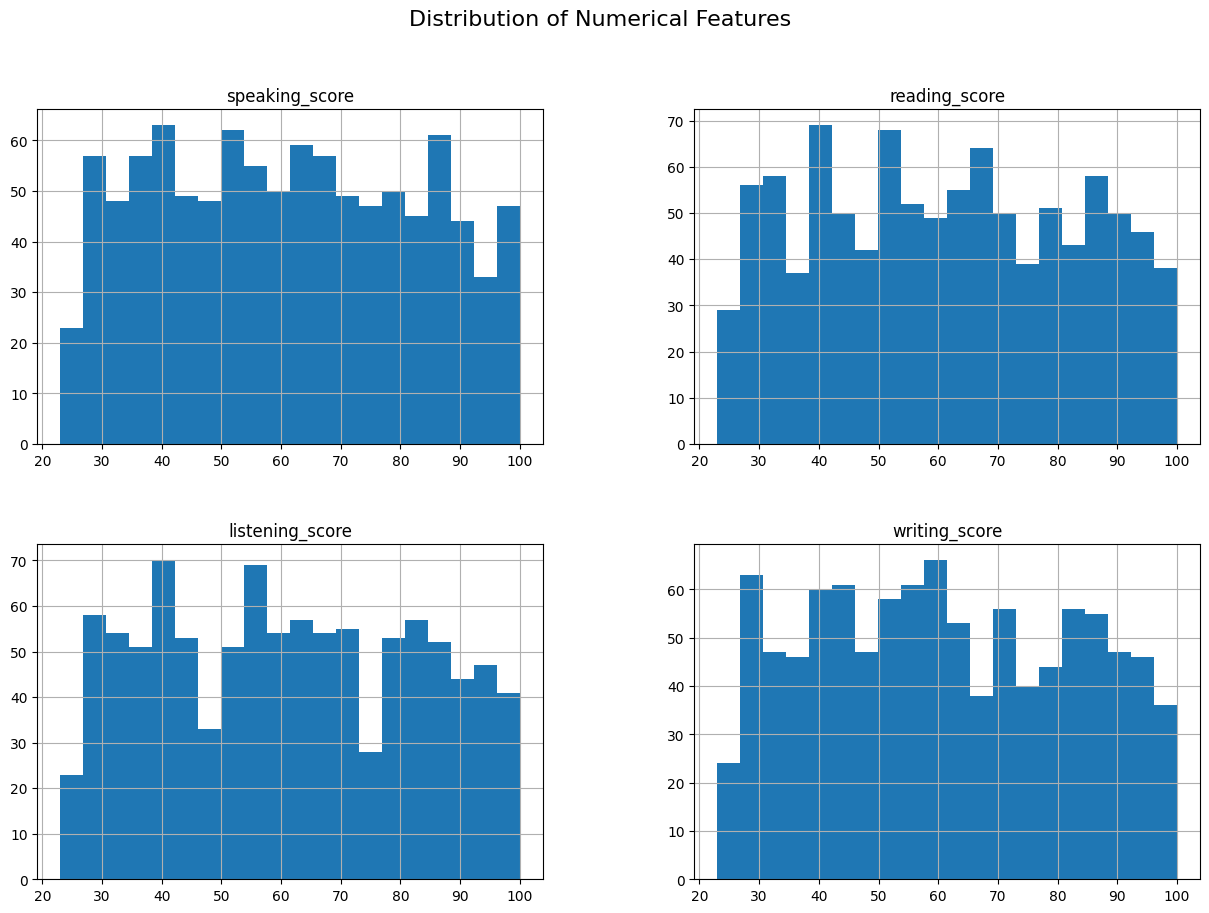

In [22]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

df[num_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

**Insights:**  
- All four score distributions (speaking, reading, listening, writing) span a wide range (20–100), showing that the dataset covers learners across multiple proficiency levels.  
- The distributions are relatively uniform, with no extreme skewness, suggesting that the dataset is balanced enough for modelling without major transformations.  
- Small dips and peaks in certain score ranges (e.g., around 40 and 70) may indicate differences in learner performance patterns.  
- From a business perspective, this spread is valuable because it ensures the CEFR prediction model will be trained on learners from beginner (A1) through advanced (C2), making the automated classification more generalisable.

## 3. Distribution of Categorical Features
We explore frequency counts for categorical variables (e.g., CEFR levels).

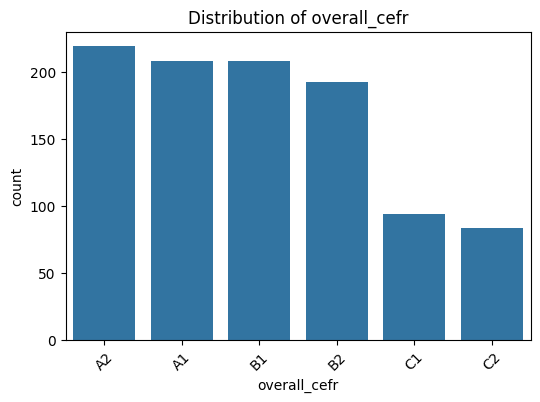

In [24]:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

### Insights from CEFR Distribution

1. **Balanced but slightly skewed distribution**  
   - The dataset is fairly balanced overall, with the **mid-levels (A1–B2)** having the highest counts (≈190–220 each).  
   - The **extremes (C1, C2)** are underrepresented, each with fewer than 100 learners.  

2. **Data sufficiency for modeling**  
   - Most classes have ~200 samples, which is sufficient for supervised classification.  
   - The imbalance at higher proficiency levels (C1, C2) may cause models to underperform for those classes unless addressed (e.g., stratified splits, class weights, or oversampling techniques like SMOTE).  

3. **Learning progression pattern**  
   - The pyramid-like distribution aligns with real-world language learning, where most learners fall into beginner-to-intermediate levels (A1–B2), and fewer reach advanced proficiency (C1, C2).  
   - This realistic distribution enhances the dataset’s validity.  

4. **Implications for ML tasks**  
   - **Stratified train-test split** should be used to preserve class balance during training.  
   - Evaluation should include metrics like **macro F1** or **balanced accuracy** rather than relying solely on accuracy, to ensure fair performance across underrepresented classes.  


## 4. Correlation Analysis
We use a heatmap and pairplot to explore relationships between numerical features.

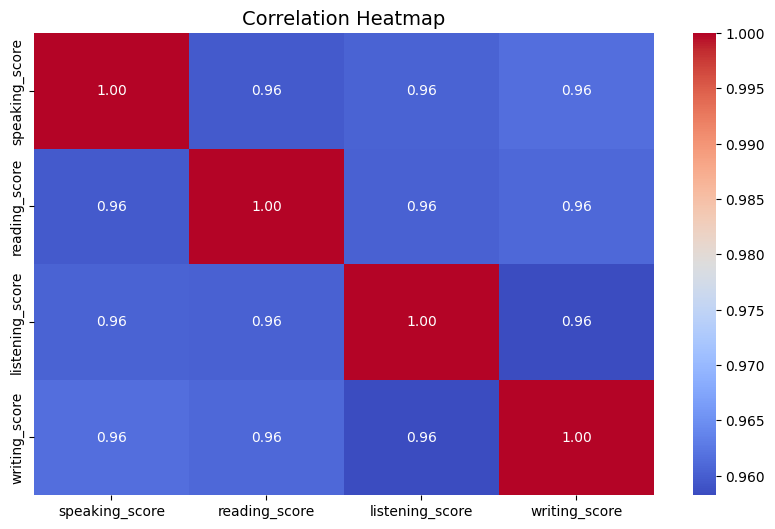

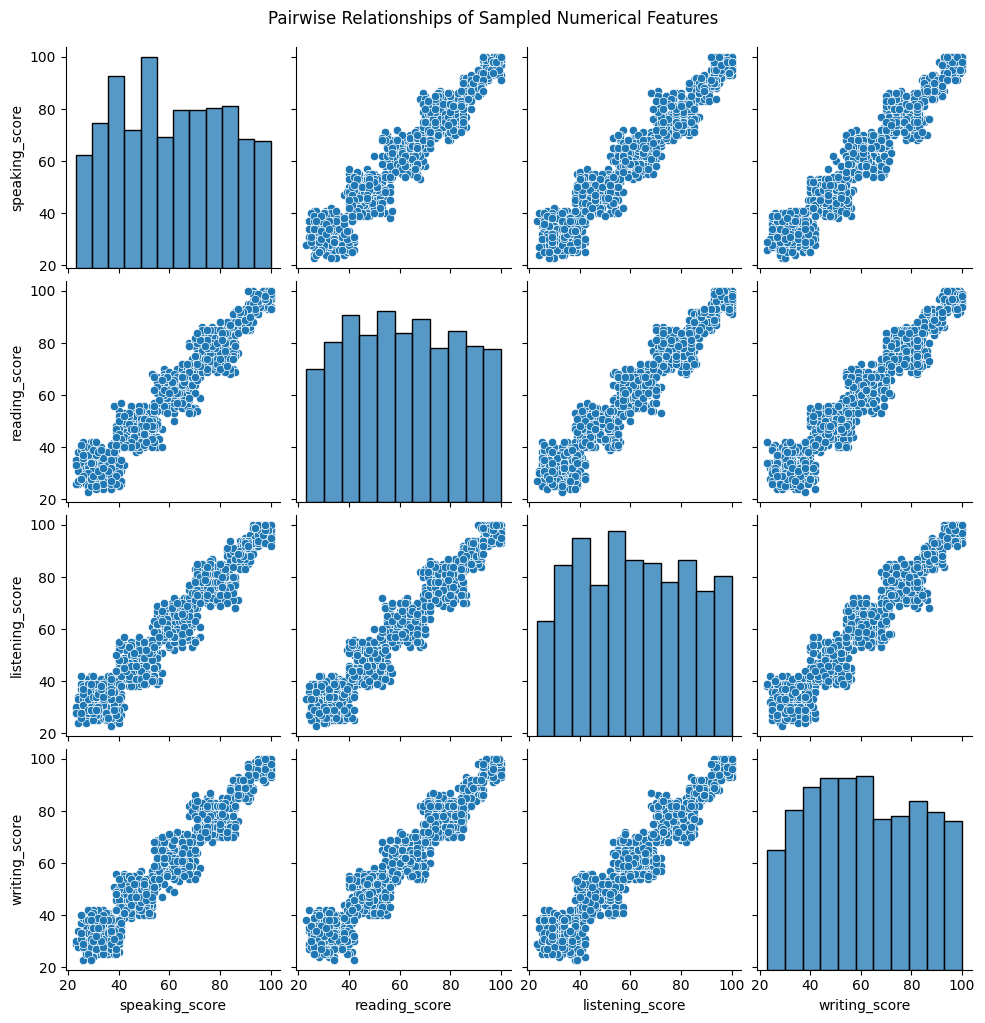

In [25]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

# Pairplot for up to 4 numeric columns (sample if many exist)
sampled_cols = num_cols.to_list()  # convert Index to list
if len(sampled_cols) > 4:
    sampled_cols = pd.Series(sampled_cols).sample(4, random_state=42).tolist()

sns.pairplot(df[sampled_cols])
plt.suptitle("Pairwise Relationships of Sampled Numerical Features", y=1.02)
plt.show()

#### Correlation Heatmap

**Insights:**  
- All four language skill scores (speaking, reading, listening, writing) are **very strongly correlated** with each other (coefficients ≈ 0.96).  
- This indicates that learners who perform well in one skill tend to also perform well across the others.  
- Such high correlations may introduce **multicollinearity** into ML models, meaning feature selection or dimensionality reduction could be necessary.  
- From a business perspective, the strong overlap suggests that proficiency is holistic: improving one skill often reflects overall CEFR advancement, which supports the case for an automated CEFR classifier that leverages multiple scores.

#### Pairplot

**Insights:**  
- Scatter plots confirm the **linear and positive relationships** between all pairs of language skills.  
- The clear upward trends indicate that higher scores in one test component are consistently associated with higher scores in the others.  
- Distributions along the diagonal again show a fairly uniform spread, covering the full score range (20–100), ensuring the dataset represents learners across CEFR levels.  
- For the business requirement, these relationships highlight that while skills are interdependent, analyzing the **relative differences** between them (e.g., stronger writing vs weaker listening) may still provide additional predictive power for CEFR classification.

## 5. Boxplots & Outlier Detection
Boxplots highlight the spread of scores by category, while IQR detects potential outliers.

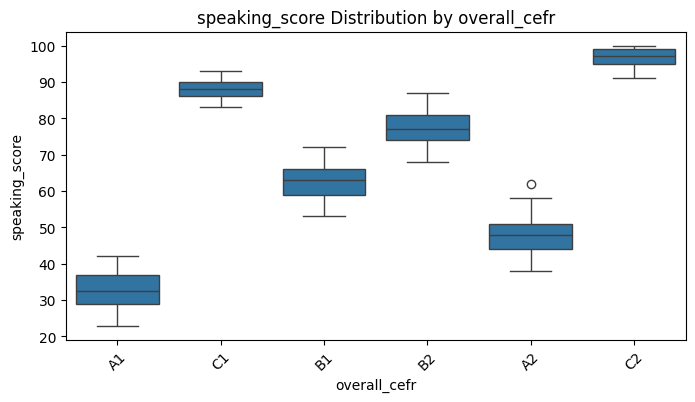

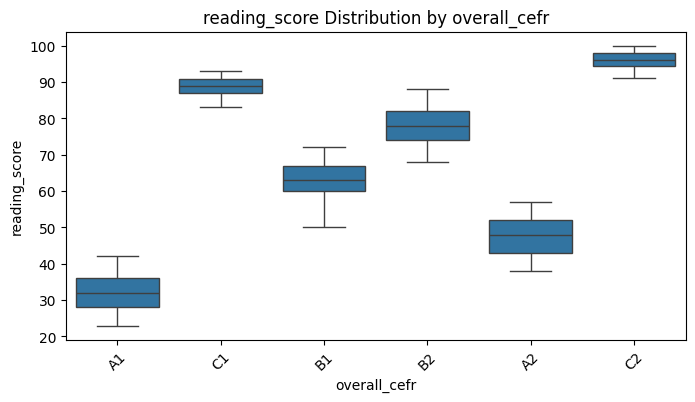

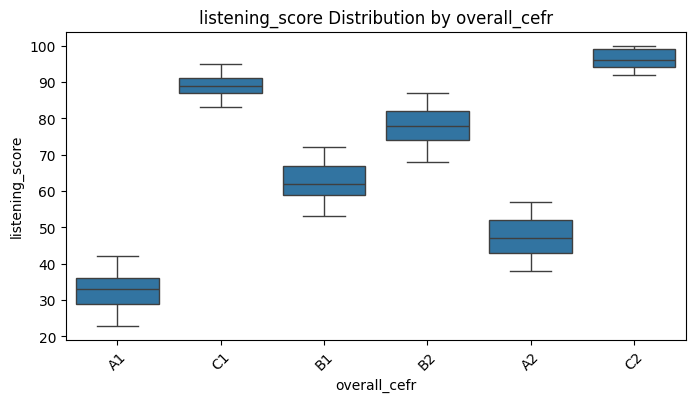

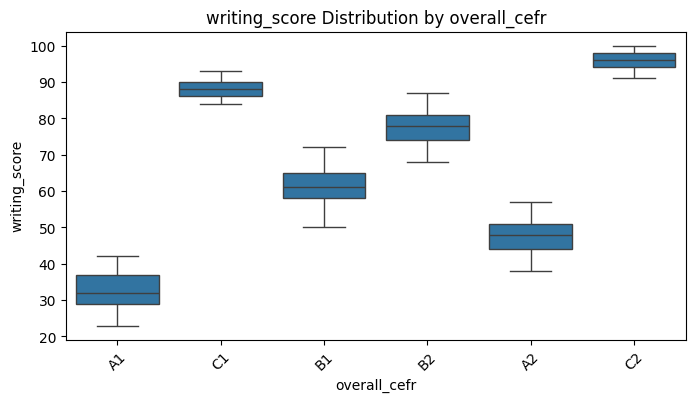

speaking_score: 0 potential outliers
reading_score: 0 potential outliers
listening_score: 0 potential outliers
writing_score: 0 potential outliers


In [26]:
for col in cat_cols:
    for num in num_cols:
        plt.figure(figsize=(8,4))
        sns.boxplot(x=df[col], y=df[num])
        plt.title(f"{num} Distribution by {col}")
        plt.xticks(rotation=45)
        plt.show()

# Quick IQR-based outlier check
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} potential outliers")

### Key Insights from CEFR Skill Distributions

1. **Speaking Scores**  
   - Scores increase steadily from A1 through C2 with clear separation.  
   - Lower CEFR levels (A1–A2) show wider variability, while advanced levels (C1–C2) are tightly clustered near the maximum.  
   - Speaking ability is therefore a strong indicator of overall proficiency.

2. **Reading Scores**  
   - Clear upward trend across CEFR levels with distinct medians.  
   - Minimal overlap between adjacent levels.  
   - Reading is a highly reliable predictor for CEFR classification.

3. **Listening Scores**  
   - Consistent progression from beginner (A1) to advanced (C2).  
   - Variability decreases at higher levels, with C2 learners scoring almost uniformly above 90.  
   - Listening strongly correlates with overall proficiency.

4. **Writing Scores**  
   - Stepwise separation across CEFR levels, particularly from B1 upwards.  
   - Minimal overlap, with learners clustering in distinct ranges.  
   - Writing proficiency scales predictably with CEFR.

5. **Overall Observation**  
   - All four skills (speaking, reading, listening, writing) show monotonic progression with CEFR levels.  
   - Distinct clustering by CEFR provides strong evidence that scores can be used to **automate CEFR classification reliably**.  
   - This supports the business requirement of delivering consistent, scalable, and objective learner assessment.

## 6. Predictive Power Score (PPS) Analysis

While correlation analysis is useful, it only captures **linear relationships** between variables.  
The **Predictive Power Score (PPS)** is a metric that evaluates how well one variable can be used to **predict another**, capturing both linear and non-linear relationships.  

In this project, PPS is especially important because:  
- It helps identify which test scores (Listening, Reading, Writing, Speaking) are most predictive of the **CEFR level**.  
- This aligns directly with the business requirement of **automating CEFR classification**, since knowing the most predictive features guides model design and feature engineering.

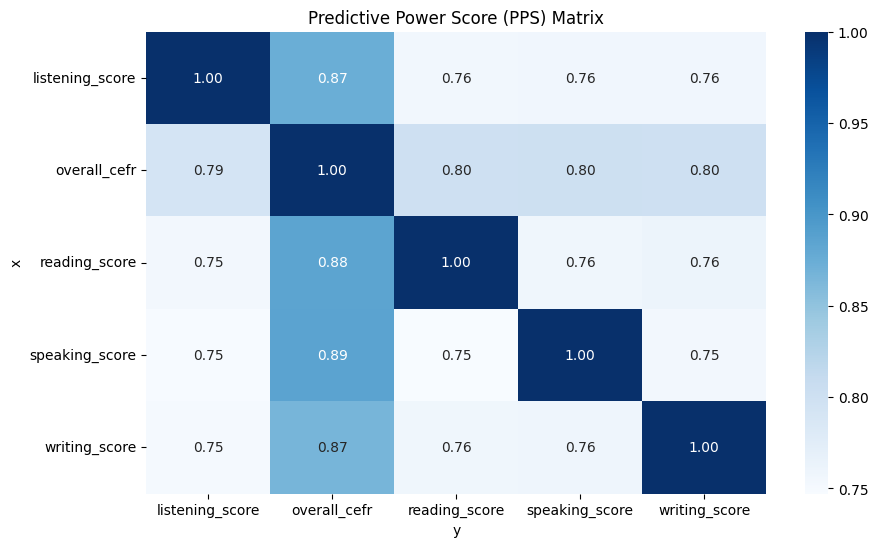

In [27]:
#import pps
import ppscore as pps

# PPS matrix
pps_matrix = pps.matrix(df)

# PPS heatmap
plt.figure(figsize=(10,6))
sns.heatmap(
    pps_matrix.pivot(index="x", columns="y", values="ppscore"),
    cmap="Blues",
    annot=True,
    fmt=".2f"
)
plt.title("Predictive Power Score (PPS) Matrix")
plt.show()

**Interpretation of PPS results:**  

The PPS matrix shows that all four skill scores (*speaking, reading, listening, writing*) have strong predictive power for the overall CEFR level, with scores in the **0.79–0.89** range. 

This suggests that no single skill dominates disproportionately; instead, each contributes meaningfully to the overall proficiency classification.  

Among them, **speaking (0.89)** and **reading (0.88)** emerge as the strongest predictors of CEFR levels, followed closely by **writing** and **listening**. The relatively balanced predictive contributions align with the CEFR’s holistic approach, where performance across all modalities is important.  

This confirms that using all four skills as input features for modeling is justified.  

---